## k-NN(k-최근접 이웃)

- 가장 가까운 훈련 데이터 초인트 하나를 최근접 이웃으로 찾아 예측에 사용한다. 
- 훈련 데이터셋을 그냥 저장하는 것이 모델을 만드는 것 = 가장 간단한 머신러닝 알고리즘 

X.shape :  (26, 2)


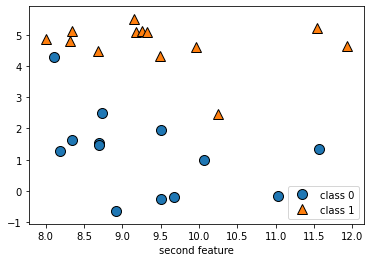

In [4]:
import mglearn
import matplotlib.pyplot as plt
import warnings

#warning 메세지 무시 
warnings.filterwarnings('ignore')

# 데이터 셋 만들기 
X, y = mglearn.datasets.make_forge()

mglearn.discrete_scatter(X[:,0], X[:,1],y)
plt.legend(["class 0","class 1"], loc=4)
plt.xlabel("first feature")
plt.xlabel("second feature")
print("X.shape : ",X.shape)

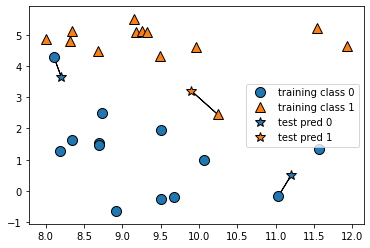

In [5]:
mglearn.plots.plot_knn_classification(n_neighbors=1)  #forge data에 대한 1-최근접 이웃 모델 예측 
#데이터 포인트 3개에 대해 가장 가까운 훈련 데이터 포인트를 연결 -> 결과 : 연결된 훈련 데이터 포인트와 같은 label로 예측 

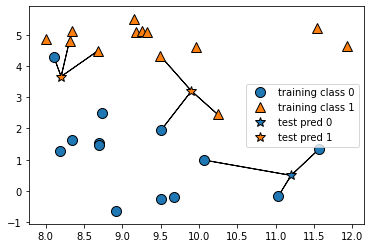

In [6]:
#k개의 이웃에 대한 알고리즘  : k-nn 알고리즘 
#레이블을 정하기 위해 투표를 하여 이웃이 더 많은 클래스의 label로 예측, 즉 k개의 이웃중 다수의 클래스가 label이 된다. 
mglearn.plots.plot_knn_classification(n_neighbors=3) # k=3

### 클래스가 여러개인 데이터셋에도 같은 방법 적용 
## scikit-learn을 이용한 k-nn 알고리즘

### 1. 데이터 나누기

In [7]:
from sklearn.model_selection import train_test_split
X,y = mglearn.datasets.make_forge()

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)

### 2. KNeighborsClassifier를 import 하고 객체만들기 

In [8]:
#이웃 수 지정 (매개변수)
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

In [9]:
#훈련 셋을 사용하여 모델 학습시키기
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [10]:
#predic메소드 호출 
#테스트 셋의 각 데이터 포인트에 대해 훈련 셋에거 가장 가까운 이웃을 계산한 다음 가장 많은 클래스 찾기 
print("테스트 데이터 예측: ",clf.predict(X_test))

테스트 데이터 예측:  [1 0 1 0 1 0 0]


In [11]:
# 모델 평가 
print("테스트 셋의 정확도 측정 : {:.2f}".format(clf.score(X_test, y_test)))


테스트 셋의 정확도 측정 : 0.86


## KNeighborsClassifier 분석
- 알고리즘이 클래스 0과 클래스 1로 지정한 영역으로 나뉘는 결정경계를 볼 수 있다. 

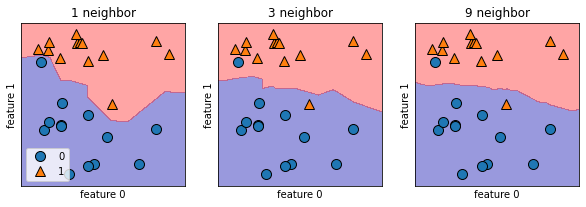

In [15]:
#k가 1,3,9 일때의 결정경계를 보여준다. 
fig, axes = plt.subplots(1,3,figsize = (10,3))

for n_neighbors, ax in zip([1,3,9], axes):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X,y)
    mglearn.plots.plot_2d_separator(clf,X, fill = True, eps = 0.5, ax= ax, alpha=.4)
    mglearn.discrete_scatter(X[:,0], X[:,1],y,ax=ax)
    ax.set_title("{} neighbor".format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")

axes[0].legend(loc=3)

- 이웃의 수가 늘어날 수록 결정경계 (decision boundary)가 더 부드러워지는 것을 알 수 있다.
- 부드러운 경계는 더 단순한 모델을 의미한다. 
- 이웃을 적게 잡을수록 모델의 복잡도가 높아진다. 

## 모델의 복잡도와 일반화 사이의 관계 

In [39]:
#실제 유방암 데이터셋 ㅇ용

from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=66)

training_accuracy = []
test_accuracy = []

neighbors_settings = range(1,11)

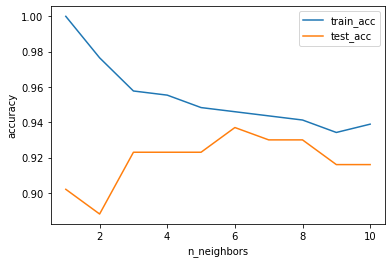

In [40]:
# 모델 생성
for n_neighbors in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors= n_neighbors)
    clf.fit(X_train, y_train)
    training_accuracy.append(clf.score(X_train, y_train))#훈련 셋 정확도 저장
    test_accuracy.append(clf.score(X_test, y_test)) #일반화 정확도 저장 
    
   
plt.plot(neighbors_settings, training_accuracy, label="train_acc")
plt.plot(neighbors_settings, test_accuracy, label="test_acc")
    
plt.ylabel("accuracy")
plt.xlabel("n_neighbors")
plt.legend()
    
    
    

- 이웃수에 따른 훈련 셋과 테스트셋의 정확도를 보여준다. 
- 테스트 셋의 정확도가 가장 좋을 때는 여섯개를 사용한 경우 
- 이웃의 수가 늘어나며 모델이 단순해지고 훈련 데이터의 정확도는 줄어든다. 


## K-최근점 이웃 회귀
- k-nn 알고리즘의 경우 회귀에도 사용된다. 
